# Homework 3

### Name: Emma Virnelli
### Collaborator:


DATA 201

Fall 2024

Tufts University

### Packages

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [169]:
data = yf.download('^DJI', start='2021-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


## Question 1: Trend Analysis of Closing Prices
### Objective: 
- Analyze the trend of closing prices of the ^DJI index over the specified period.

### Instructions:

- Use Pandas to manipulate the data and extract Closing Prices.
- Use Matplotlib or Seaborn to visualize the trend of closing prices from 2021-01-01 to 2024-01-01.

In [172]:
#Your Code here
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2021-01-04 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       753 non-null    float64
 1   High       753 non-null    float64
 2   Low        753 non-null    float64
 3   Close      753 non-null    float64
 4   Adj Close  753 non-null    float64
 5   Volume     753 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.2 KB


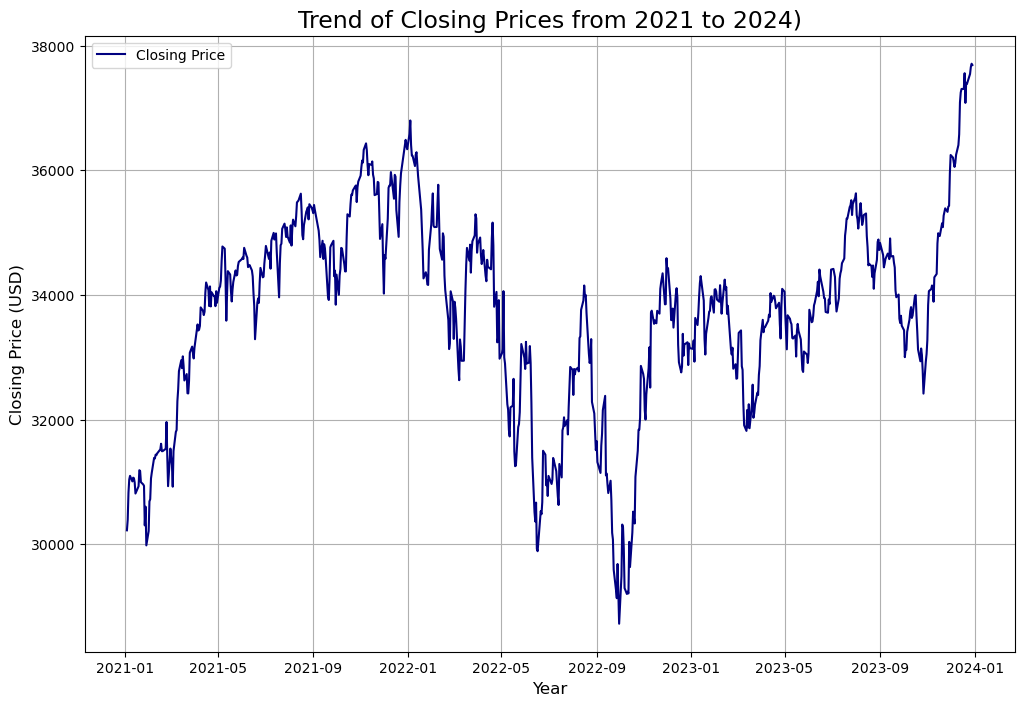

In [174]:
#Use Pandas to manipulate the data and extract Closing Prices
closing_prices = data['Close']

#Use Matplotlib or Seaborn to visualize the trend of closing prices from 2021-01-01 to 2024-01-01
plt.figure(figsize=(12, 8))
sns.lineplot(data=closing_prices, label='Closing Price', color = 'navy')
plt.title('Trend of Closing Prices from 2021 to 2024)', size = '17')
plt.xlabel('Year', size = '12')
plt.ylabel('Closing Price (USD)', size = '12')
plt.legend()
plt.grid(True)
plt.show()

## Question 2: Moving Average Analysis
### Objective: 
- Determine the short-term and long-term moving averages and analyze potential buy/sell signals.

### Instructions:

- Calculate the short-term (e.g., 50 days) and long-term (e.g., 200 days) moving averages.
- Use Matplotlib to visualize the moving averages along with the closing prices.


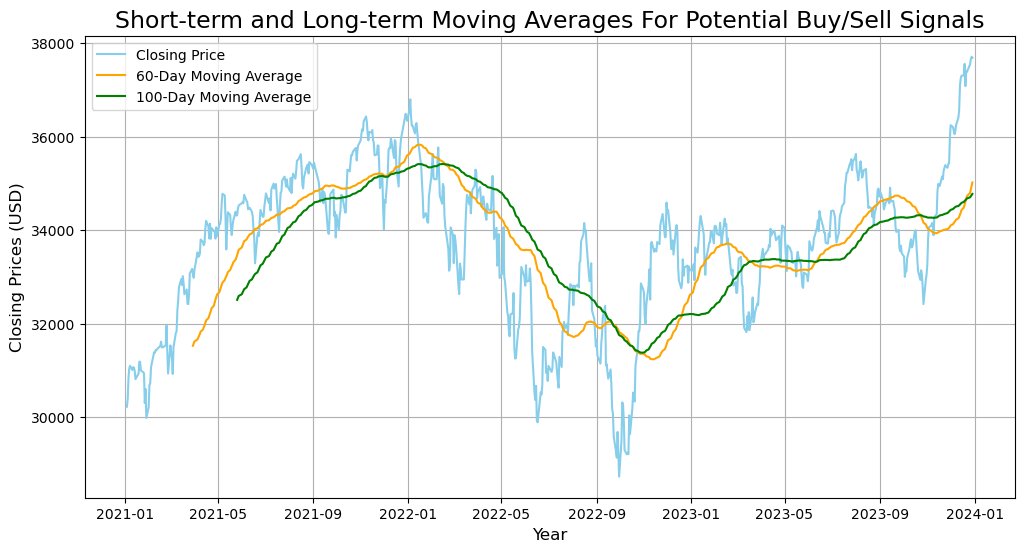

In [177]:
#Your Code here

#Calculate the short-term (e.g., 50 days) averages 
data['Short Term Move Avg'] = closing_prices.rolling(60).mean()

#Calculate long-term (e.g., 200 days) moving averages
data['Long Term Move Avg'] = closing_prices.rolling(100).mean()

#Use Matplotlib to visualize the moving averages along with the closing prices
plt.figure(figsize=(12, 6))
sns.lineplot(data=data['Close'], label='Closing Price', color = 'skyblue')
sns.lineplot(data=data['Short Term Move Avg'], label='60-Day Moving Average', color = 'orange')
sns.lineplot(data=data['Long Term Move Avg'], label='100-Day Moving Average', color = 'green')
plt.title('Short-term and Long-term Moving Averages For Potential Buy/Sell Signals', size = '17')
plt.xlabel('Year', size = '12')
plt.ylabel('Closing Prices (USD)', size = '12')
plt.grid(True)
plt.show()


## Question 3: Daily Return Analysis
### Objective: 
- Compute and analyze daily returns of the ^DJI index to evaluate daily performance.

### Instructions:

- Calculate daily returns using the ‘Close’ column.
- Use Seaborn or Matplotlib to visualize the distribution of daily returns through a histogram.

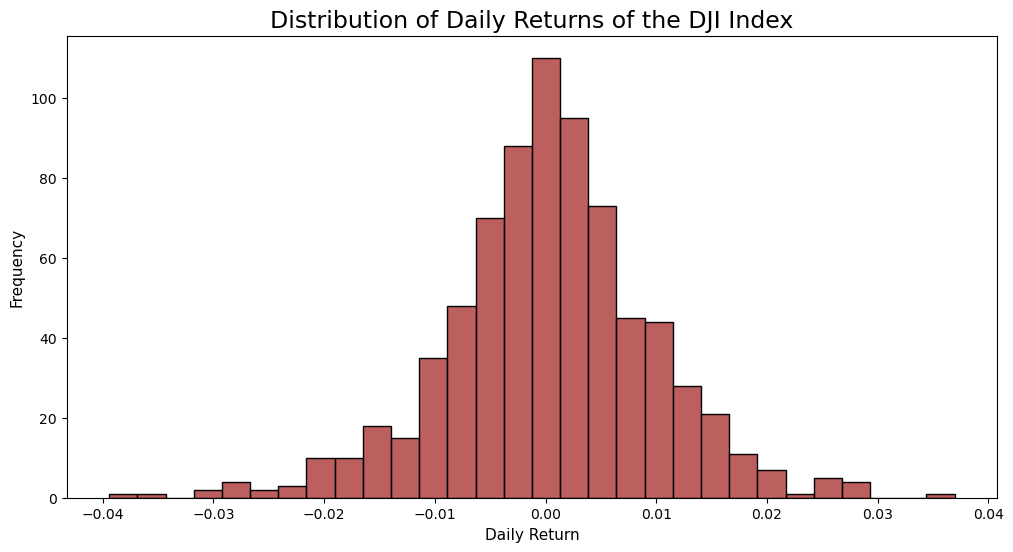

In [180]:
#Your Code here

#Calculate daily returns using the ‘Close’ column
data['Daily Returns'] = data['Close'].pct_change()

#Use Seaborn or Matplotlib to visualize the distribution of daily returns through a histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['Daily Returns'], bins=30, color = 'brown', edgecolor ='black')
plt.title('Distribution of Daily Returns of the DJI Index', size = '17')
plt.xlabel('Daily Return', size = '11')
plt.ylabel('Frequency', size = '11')
plt.grid(False)
plt.show()


## Question 4: Volatility Analysis
### Objective: 
- Compute and analyze the rolling volatility of the ^DJI index over a specified window.

### Instructions:

- Calculate the rolling standard deviation for a specified window (e.g., 21 days) to estimate volatility.
- Plot and analyze periods of high and low volatility.

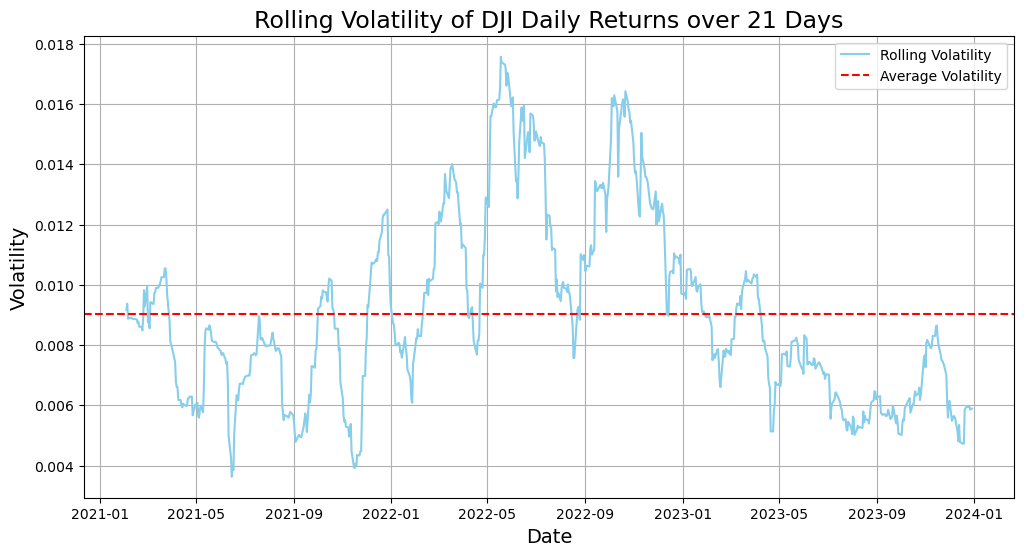

In [183]:
#Your Code here

#Calculate the rolling standard deviation for a specified window (e.g., 21 days) to estimate volatility
data['Rolling Volatility'] = data['Daily Returns'].rolling(21).std()

#Plot and analyze periods of high and low volatility.
plt.figure(figsize=(12, 6))
sns.lineplot(data=data['Rolling Volatility'], label='Rolling Volatility', color = 'skyblue')
plt.title('Rolling Volatility of DJI Daily Returns over 21 Days', size = '17')
plt.xlabel('Date', size = '14')
plt.ylabel('Volatility', size = '14')
plt.grid(True)

#To understand the highs and lows an average line needs to be put in place
plt.axhline(y=data['Rolling Volatility'].mean(), color='red', linestyle='--', label='Average Volatility')
plt.legend()
plt.show()


## Question 5: Cumulative Return Analysis
### Objective: 
- Analyze the cumulative return of the ^DJI index for the given time period.

### Instructions:

- Calculate the cumulative daily returns.
- Use Matplotlib to visualize the cumulative return over the given period.

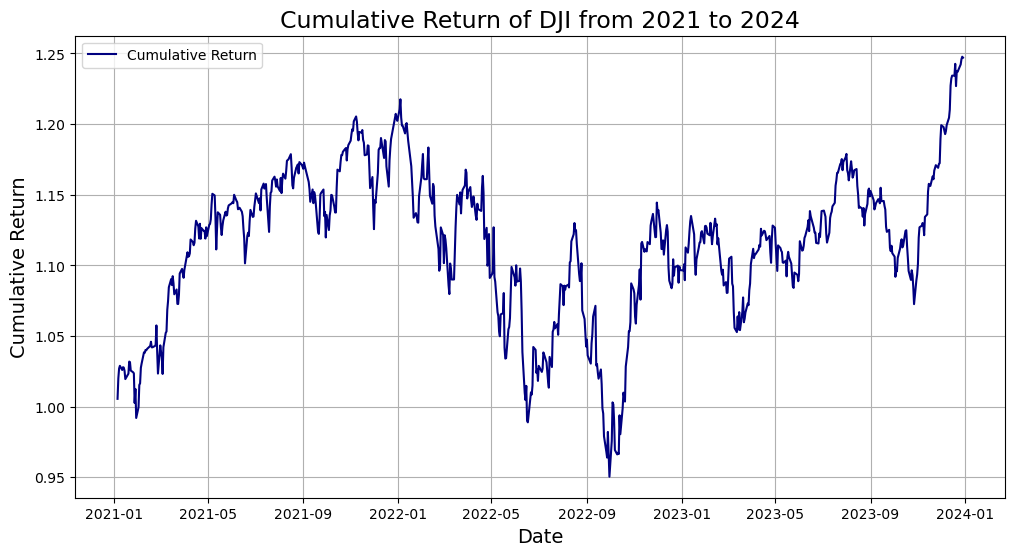

In [186]:
#Your Code here

#Calculate the cumulative daily returns
data['Cumulative Return'] = (1 + data['Daily Returns']).cumprod()

#Use Matplotlib to visualize the cumulative return over the given period
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Return'], label='Cumulative Return', color = 'navy')
plt.title('Cumulative Return of DJI from 2021 to 2024', size = '17')
plt.xlabel('Date', size = '14')
plt.ylabel('Cumulative Return', size = '14')
plt.legend()
plt.grid(True)
plt.show()


## Question 6: Month-wise Performance Analysis
### Objective: 
- Evaluate the performance of the ^DJI index on a monthly basis.

### Instructions:

- Resample the data to a monthly time frame and calculate monthly returns.
- Visualize monthly returns using a bar chart and identify patterns or anomalies.

Date
2021-02-28    0.031677
2021-03-31    0.066247
2021-04-30    0.027085
2021-05-31    0.019324
2021-06-30   -0.000780
Freq: ME, Name: Close, dtype: float64


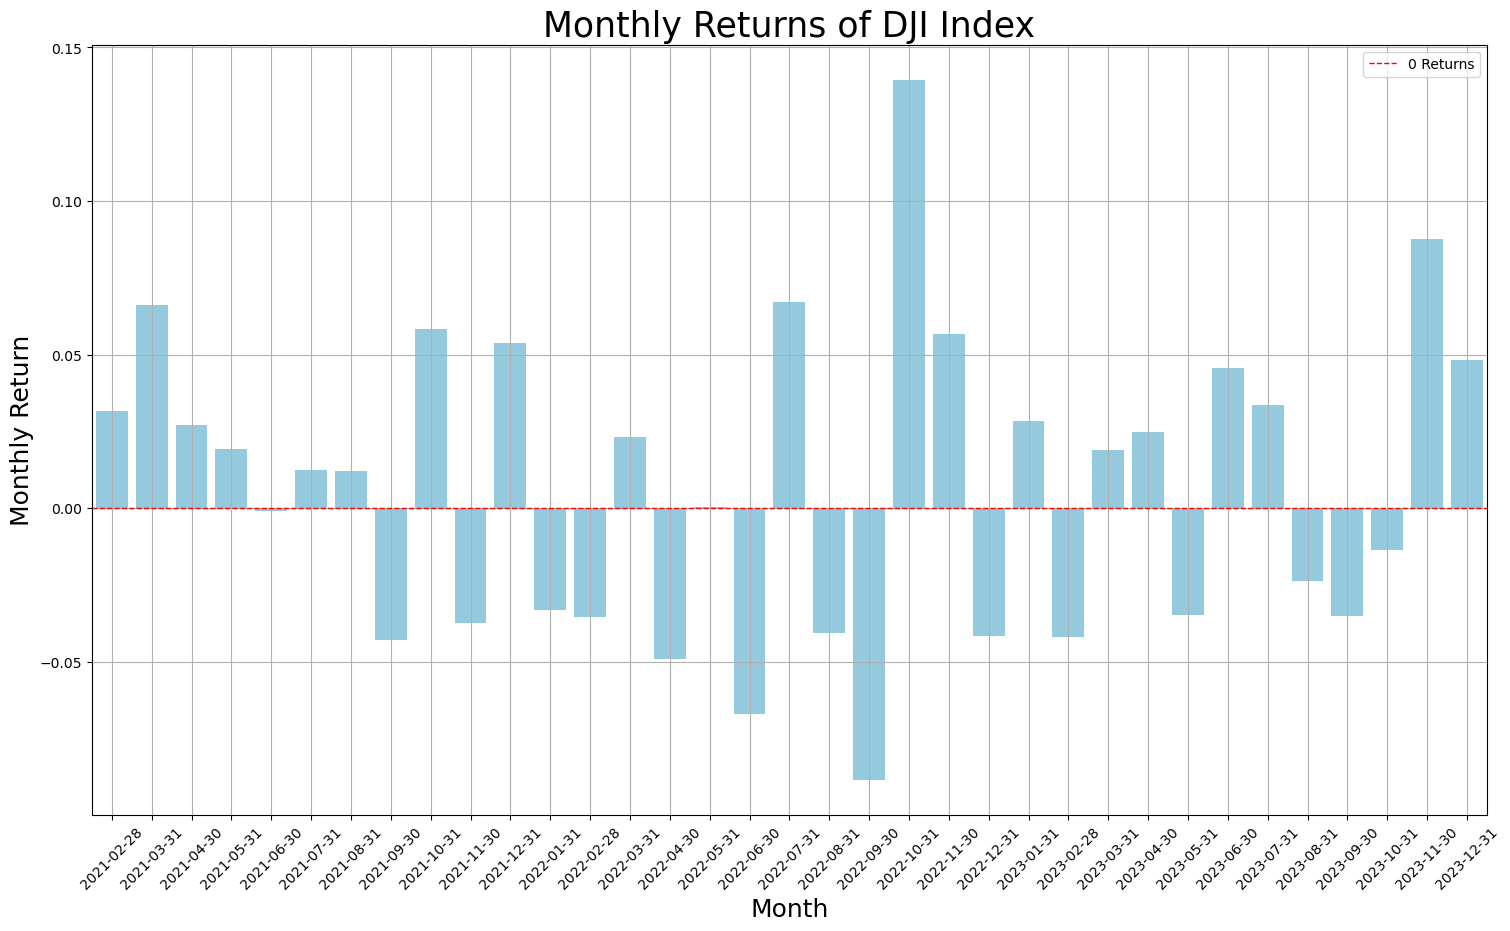

In [189]:
#Your Code here

#Resample the data to a monthly time frame and calculate monthly returns
monthly_returns = data['Close'].resample('ME').ffill().pct_change().dropna()

print(monthly_returns.head(5))

# Plot the monthly returns using a bar chart
plt.figure(figsize=(18, 10))
sns.barplot(x = monthly_returns.index, y = monthly_returns.values, color= 'skyblue')
plt.title('Monthly Returns of DJI Index', size = '25')
plt.xlabel('Month', size = '18')
plt.ylabel('Monthly Return', size = '18')
plt.grid(True)
#reference line for 0
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='0 Returns')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## Question 7: Historical High and Low Price Analysis
### Objective: 
- Analyze periods where the ^DJI index achieved historical highs and lows.

### Instructions:

- Identify dates where the ^DJI index achieved historical highs and lows.
- Use Matplotlib to visualize these points on the price chart.

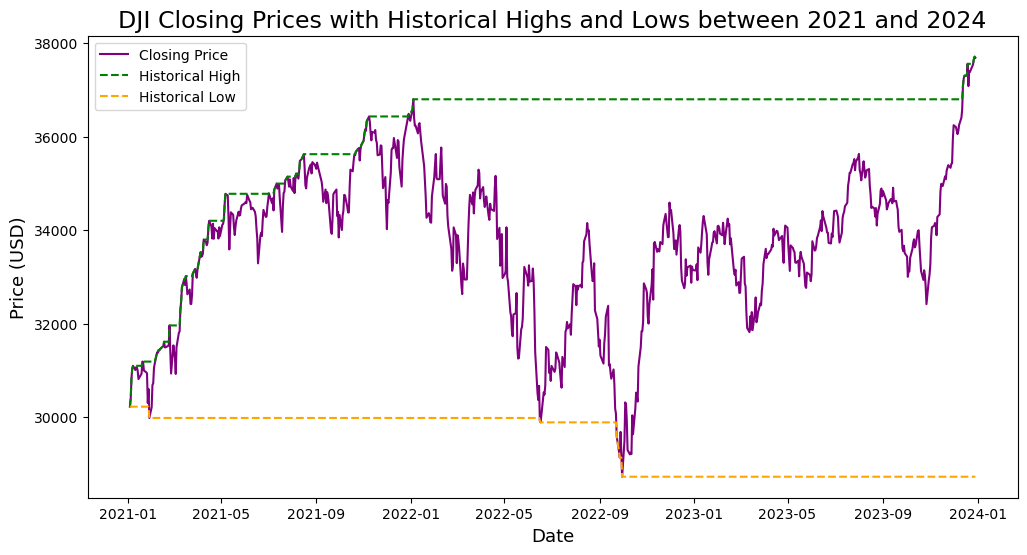

In [192]:
#Your Code here

# Identify dates where the ^DJI index achieved historical highs and lows
data['Historical_High'] = data['Close'].cummax()
data['Historical_Low'] = data['Close'].cummin()


#Use Matplotlib to visualize these points on the price chart
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price', color = 'purple')
# Since we are looking for mutliple historical highs and lows, I chose a step graph to visualize the peaks and lows
plt.plot(data['Historical_High'], label='Historical High', color= 'green', linestyle='--')
plt.plot(data['Historical_Low'], label='Historical Low', color='orange', linestyle='--')
plt.title('DJI Closing Prices with Historical Highs and Lows between 2021 and 2024', size = '17')
plt.xlabel('Date', size = '13')
plt.ylabel('Price (USD)', size = '13')
plt.legend()
plt.show()


## Question 8: Comparing Volume and Closing Price Trends
### Objective: 
- Visualize and analyze how the trading volume relates to the closing price movement.

## Instructions:

- Plot a dual-axis plot with one axis representing the closing prices and the other representing the volume.
- Ensure clarity, add titles, legends, and labels.

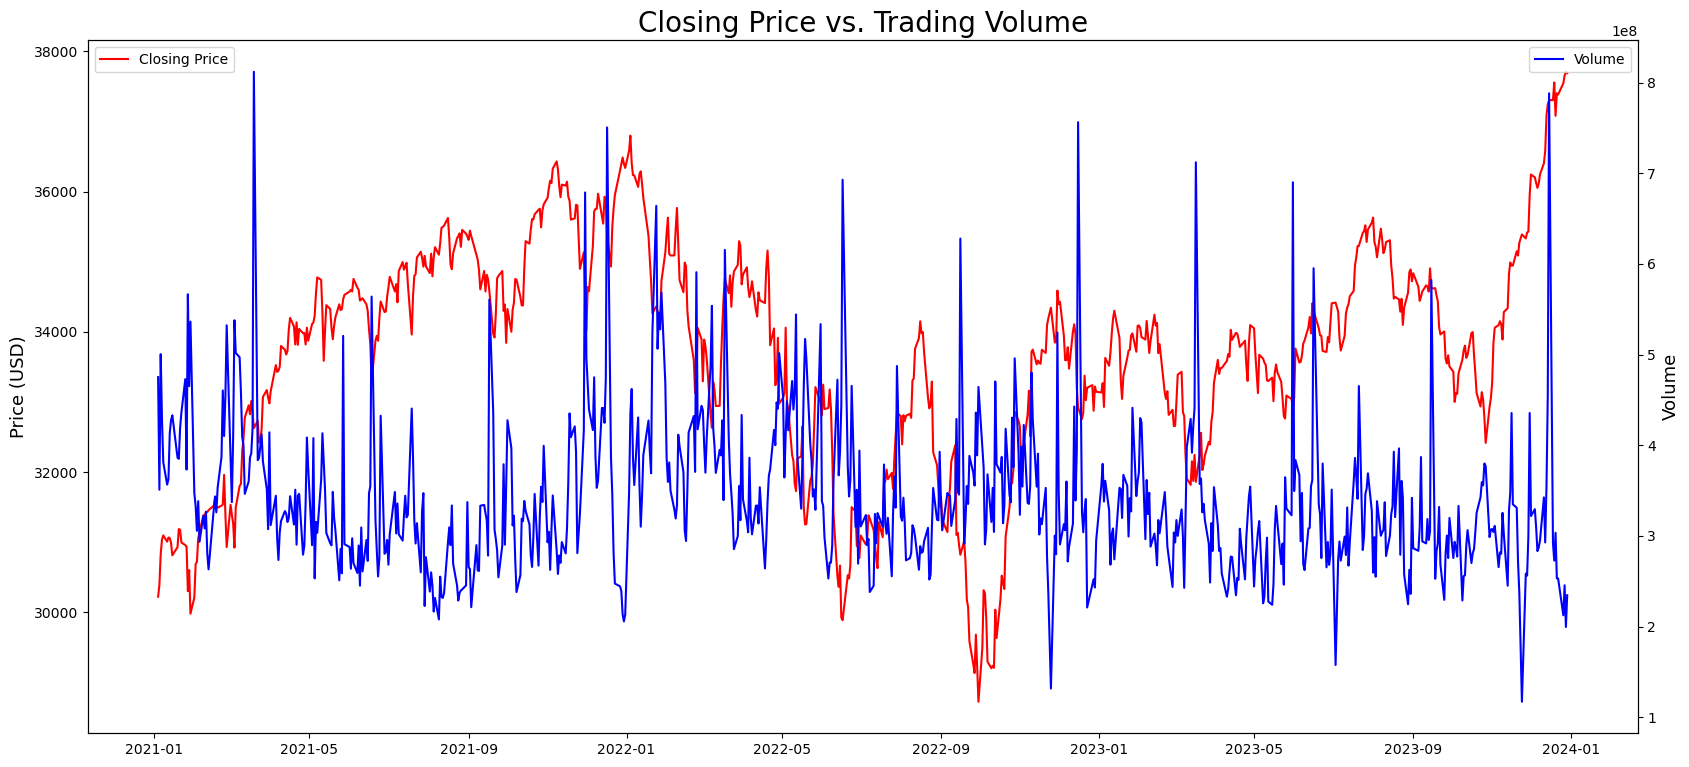

In [195]:
#Your Code here

#Plot a dual-axis plot with one axis representing the closing prices and the other representing the volume
fig, ax1 = plt.subplots(figsize=(20, 9))
                        
#Ensure clarity, add titles, legends, and labels
ax1.plot(data['Close'], color ="red", label='Closing Price')
ax1.set_ylabel('Price (USD)', size = '13')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(data['Volume'],color = 'blue', label='Volume')
ax2.set_ylabel('Volume', size = '13')
ax2.tick_params(axis='x')
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title('Closing Price vs. Trading Volume', size = '20')
plt.show()


## Question 9: Heatmap of Monthly Average Closing Prices
### Objective: 
- Visualize the monthly average closing prices over the years.

### Instructions:

- Aggregate data to calculate the average closing prices for each month across years.
- Create a heatmap to visualize these averages.

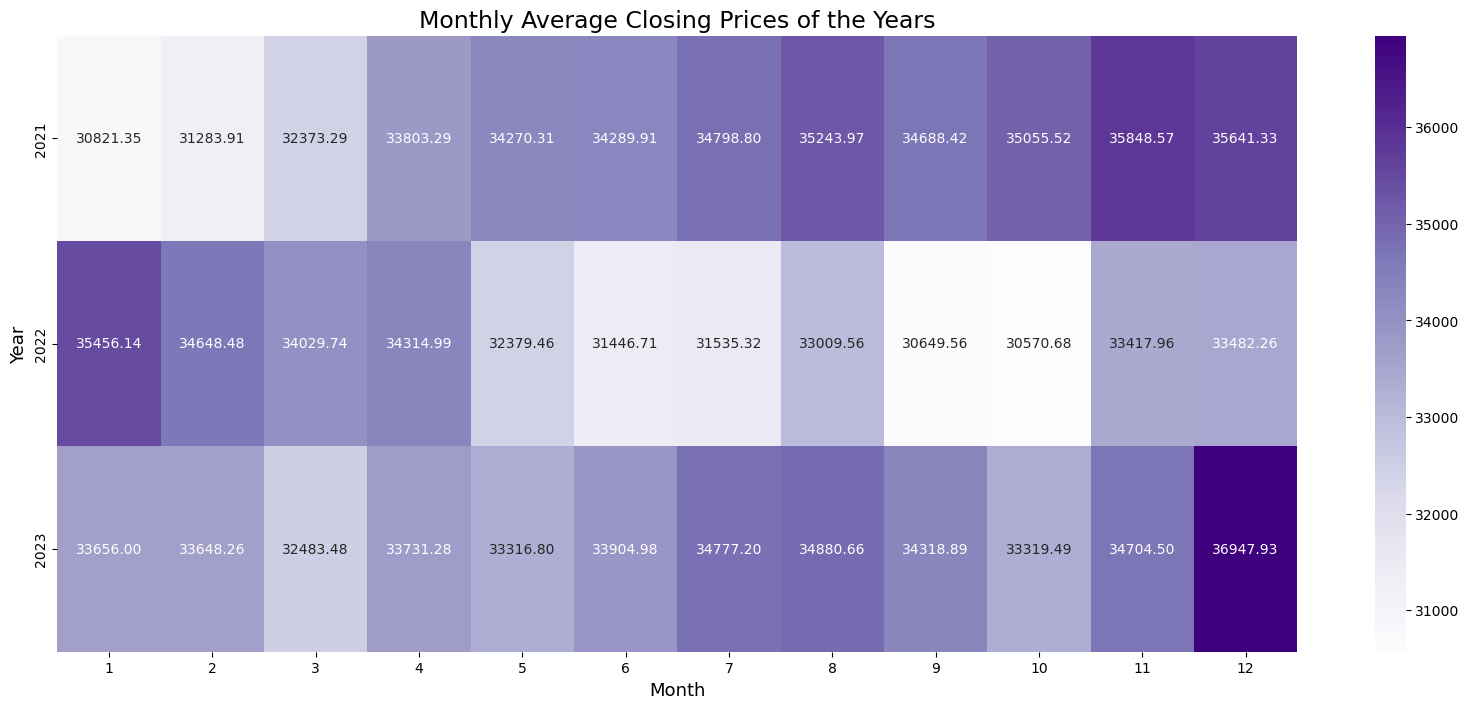

In [198]:
#Aggregate data to calculate the average closing prices for each month across years.
data['Year'] = data.index.year
data['Month'] = data.index.month
monthly_avg = data.groupby(['Year', 'Month'])['Close'].mean().reset_index()


#Create a heatmap to visualize these averages.
heatmap = monthly_avg.pivot(index='Year', columns='Month', values='Close')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap, cmap='Purples', annot=True, fmt=".2f")
plt.title('Monthly Average Closing Prices of the Years', size = '17')
plt.xlabel('Month', size = '13')
plt.ylabel('Year', size = '13')
plt.show()


## Question 10: Histogram of Daily Price Changes
### Objective: 
- Visualize and analyze the distribution of daily price changes.

### Instructions:

- Calculate the daily price changes.
- Plot a histogram and analyze the distribution to understand the volatility and regular movement.

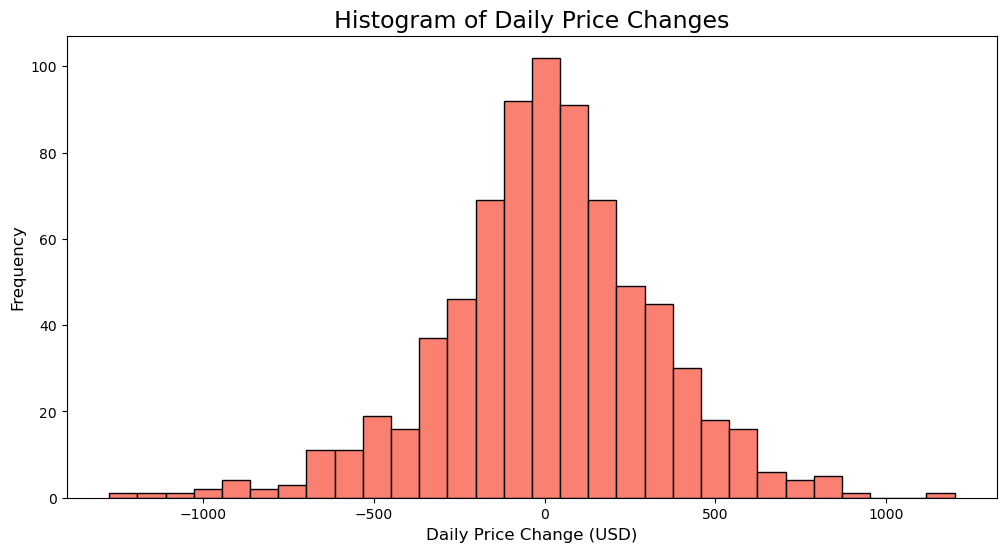

In [207]:
#Your Code here

#Calculate the daily price changes
data['Daily_Price_Change'] = data['Close'].diff()
daily_price = data['Daily_Price_Change'].dropna()

# Plot a histogram of daily price changes
plt.figure(figsize=(12, 6))
plt.hist(daily_price, bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Daily Price Changes', size = '17')
plt.xlabel('Daily Price Change (USD)', size = '12')
plt.ylabel('Frequency', size = '12')
plt.grid(False)
plt.show()
